In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")

In [3]:
from utils.utilities import get_engine
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
engine = get_engine()

In [32]:
# Get list of stock and its start date
stock_query = f"""
    SELECT 
        stock_code,
        company_name,
        first_transaction_date
    FROM public.stock_info
"""
df = pd.read_sql_query(stock_query, engine)
df

,stock_code,company_name,first_transaction_date
0,ACL,Công ty Cổ phần Xuất Nhập Khẩu Thủy sản Cửu Lo...,2007-08-23
1,ADG,Công ty Cổ phần Clever Group,2020-12-28
2,AGM,Công ty Cổ phần Xuất Nhập Khẩu An Giang,2012-09-14
3,AGR,Công ty Cổ phần Chứng khoán Agribank,2009-12-02
4,AMD,Công ty Cổ phần Đầu tư và Khoáng sản FLC Stone,2015-06-08
...,...,...,...
1652,BVH,Tập đoàn Bảo Việt,2009-06-16
1653,DPS,CTCP Đầu tư Phát triển Sóc Sơn,2021-07-02
1654,NHP,CTCP Sản xuất Xuất nhập khẩu NHP,2021-07-02
1655,SJC,CTCP Sông Đà 1.01,2021-07-02


In [10]:
def calculate_profit(stocks : pd.DataFrame):
    result = pd.DataFrame(columns = ['stock_code', 'buy_today', 'profit'])
    today = datetime.today().date()
    for _, stock in stocks.iterrows():
        query = f"""
            SELECT * 
            FROM public.transaction
            WHERE
                date >= DATE '{stock["first_transaction_date"]}'
                AND
                date <= DATE '{today}'
                AND
                stock_code = '{stock["stock_code"]}'
        """
        df = pd.read_sql_query(query, engine)
        df['MA10'] = df['close_price'].rolling(10).mean()
        df['MA50'] = df['close_price'].rolling(50).mean()
        df = df.dropna()
        df['shares'] = [1 if df.loc[i, 'MA10'] > df.loc[i, 'MA50'] else 0 for i in df.index]
        df['future_close_price'] = df['close_price'].shift(-1)
        df['profit'] = [df.loc[i, 'future_close_price'] - df.loc[i, 'close_price'] for i in df.index]
        df['wealth'] = df['profit'].cumsum()
        if len(df) >= 2:
            result.loc[len(result)] = [stock["stock_code"], df['shares'].iloc[-1], df['wealth'].iloc[-2]]
            result.index = result.index + 1

    return result


In [11]:
result = calculate_profit(df)

In [18]:
result.index = result['stock_code']
result = result.drop('stock_code', axis = 1)

In [23]:
result = result.sort_values('profit', ascending = False)

In [25]:
result

,buy_today,profit
stock_code,,
CMF,1,75.0090
VSN,1,50.5234
BHN,1,50.4361
SPB,1,26.8741
VPB,1,25.7000
...,...,...
VNX,0,-59.7624
GIL,1,-65.3746
GAS,1,-67.9433


<AxesSubplot:xlabel='stock_code'>

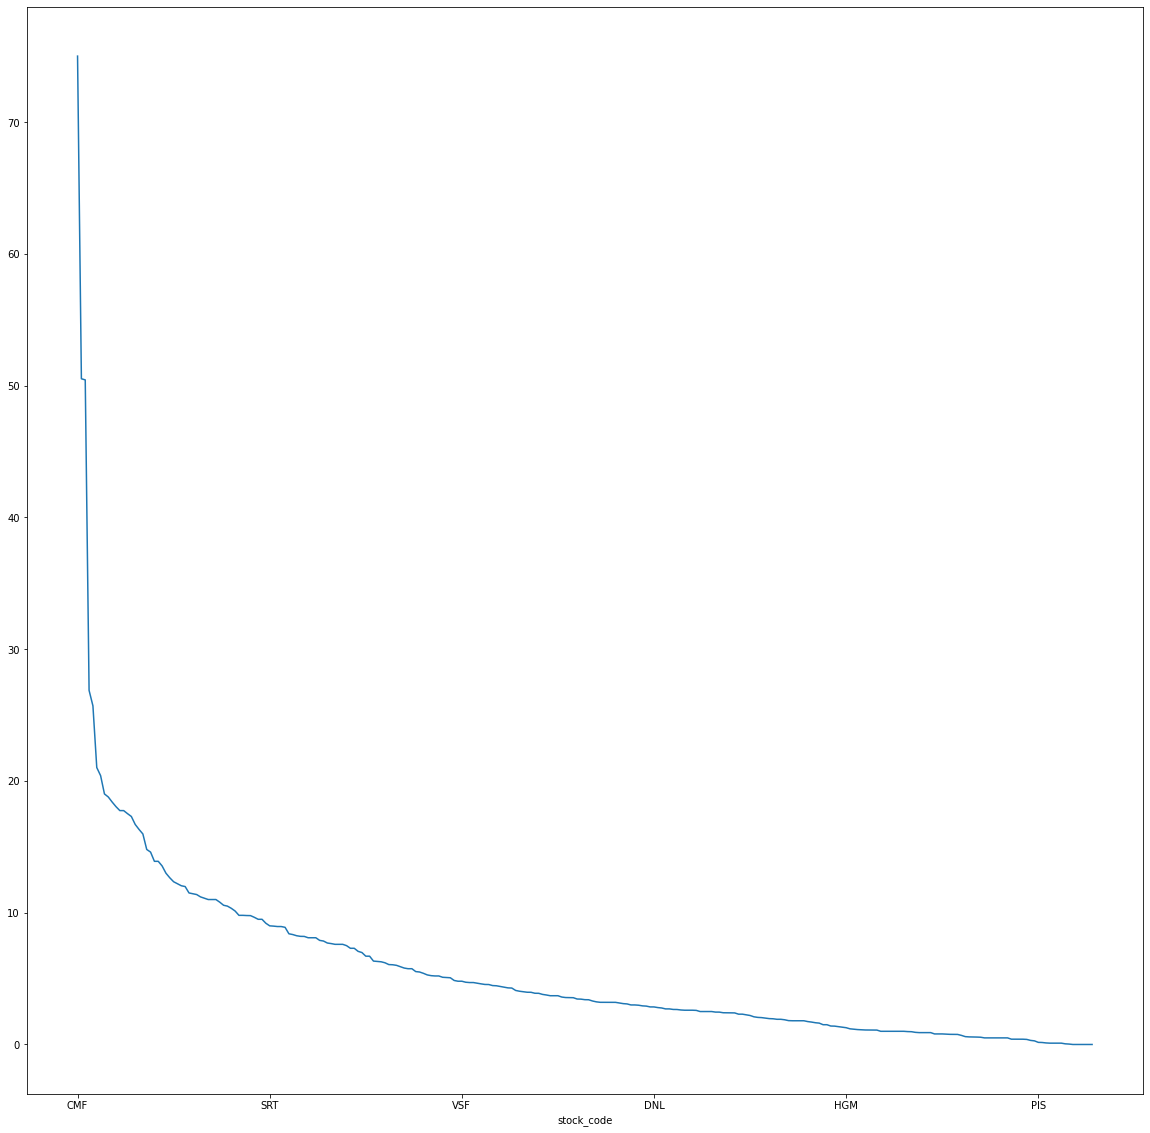

In [28]:
top_company = result[(result['buy_today'] == 1) & (result['profit'] >= 0.0)]['profit']
top_company.plot(figsize = (20, 20))


In [31]:
top_company.index.tolist()

['CMF',
 'VSN',
 'BHN',
 'SPB',
 'VPB',
 'HCM',
 'CSC',
 'DTT',
 'BLT',
 'VHM',
 'CRE',
 'DCL',
 'MBS',
 'MSH',
 'PNJ',
 'TLI',
 'HKP',
 'VCS',
 'CBI',
 'ABI',
 'CKA',
 'CQN',
 'CTG',
 'DHC',
 'ANV',
 'ADS',
 'DPR',
 'C12',
 'VSC',
 'LHG',
 'TR1',
 'VIB',
 'IFC',
 'THD',
 'VPA',
 'GMX',
 'KDC',
 'VDS',
 'BMI',
 'PLA',
 'DNS',
 'IMP',
 'HKB',
 'GVR',
 'VIG',
 'PBT',
 'FTS',
 'MWG',
 'DIH',
 'STB',
 'SRT',
 'PMT',
 'PSP',
 'DPG',
 'CEE',
 'PTV',
 'TSB',
 'BFC',
 'HAH',
 'BVB',
 'HOT',
 'ATB',
 'MA1',
 'FRC',
 'TCL',
 'IJC',
 'HMC',
 'SCS',
 'DP1',
 'CTS',
 'HTP',
 'SHG',
 'DRG',
 'NOS',
 'LTG',
 'BDB',
 'AGG',
 'SB1',
 'MAS',
 'E29',
 'STK',
 'PND',
 'QST',
 'ACM',
 'MEL',
 'PVH',
 'BWE',
 'FIT',
 'VSM',
 'AGX',
 'ACE',
 'VMD',
 'DVW',
 'EMS',
 'TSD',
 'HDG',
 'HAX',
 'SHB',
 'VW3',
 'ABB',
 'VSF',
 'HCI',
 'PHP',
 'PRO',
 'TA6',
 'CNC',
 'BWA',
 'SHI',
 'ICI',
 'VBB',
 'PGV',
 'SGT',
 'RAT',
 'DHD',
 'KOS',
 'TVM',
 'PCE',
 'PEC',
 'NTH',
 'HNP',
 'DRL',
 'LMC',
 'TMP',
 'DGW',
 'MDC',
